# A comparison of Sam Kerr & Alessio Russo in the 2023 Women's World Cup Semi-final

In [580]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import requests

from statsbombpy import sb
from soccerplots.radar_chart import Radar

from mplsoccer import Pitch, VerticalPitch

In [581]:
pd.options.display.max_rows = 999

# Initial data exploration to find correct match and players

In [582]:
# 2023 Womens World Cup has competition_id=72 and season_id=107
sb.matches(competition_id=72, season_id=107)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3904629,2023-08-16,13:00:00.000,International - Women's World Cup,2023,Australia Women's,England Women's,1,3,available,...,2023-08-30T11:17:47.551826,6,Semi-finals,Accor Stadium,Tori Penso,Tony Gustavsson,Sarina Glotzbach-Wiegman,1.1.0,2,2
1,3906390,2023-08-20,13:00:00.000,International - Women's World Cup,2023,Spain Women's,England Women's,1,0,available,...,2023-08-22T19:38:43.965521,7,Final,Accor Stadium,Tori Penso,Jorge Vilda,Sarina Glotzbach-Wiegman,1.1.0,2,2
2,3906389,2023-08-19,11:00:00.000,International - Women's World Cup,2023,Sweden Women's,Australia Women's,2,0,available,...,2023-08-29T21:19:57.035390,7,3rd Place Final,Brisbane Stadium,Cheryl Foster,Peter Gerhardsson,Tony Gustavsson,1.1.0,2,2
3,3904628,2023-08-15,11:00:00.000,International - Women's World Cup,2023,Spain Women's,Sweden Women's,2,1,available,...,2023-08-16T11:30:31.556462,6,Semi-finals,Eden Park,Edina Alves Batista,Jorge Vilda,Peter Gerhardsson,1.1.0,2,2
4,3893806,2023-07-26,10:30:00.000,International - Women's World Cup,2023,Spain Women's,Zambia Women's,5,0,available,...,2023-08-15T02:58:57.266594,2,Group Stage,Eden Park,Hyeon-Jeong Oh,Jorge Vilda,Bruce Mwape,1.1.0,2,2
5,3893801,2023-07-24,14:00:00.000,International - Women's World Cup,2023,Brazil Women's,Panama Women's,4,0,available,...,2023-08-15T03:18:08.766850,1,Group Stage,Coopers Stadium,Cheryl Foster,Pia Mariane Sundhage,Ignacio Quintana Toledo,1.1.0,2,2
6,3893797,2023-07-23,10:30:00.000,International - Women's World Cup,2023,Netherlands Women's,Portugal Women's,1,0,available,...,2023-08-15T02:40:19.749196,1,Group Stage,Forsyth Barr,NaN,Andries Jonker,Francisco Miguel Conceição Roque Neto,1.1.0,2,2
7,3893822,2023-07-31,10:00:00.000,International - Women's World Cup,2023,Japan Women's,Spain Women's,4,0,available,...,2023-08-15T03:20:22.749909,3,Group Stage,Wellington Regional Stadium,Katja Koroleva,Futoshi Ikeda,Jorge Vilda,1.1.0,2,2
8,3893814,2023-07-29,10:30:00.000,International - Women's World Cup,2023,Sweden Women's,Italy Women's,5,0,available,...,2023-08-15T02:40:42.886046,2,Group Stage,Wellington Regional Stadium,Cheryl Foster,Peter Gerhardsson,Milena Bertolini,1.1.0,2,2
9,3893790,2023-07-21,05:30:00.000,International - Women's World Cup,2023,Nigeria Women's,Canada Women's,0,0,available,...,2023-08-15T01:27:44.637065,1,Group Stage,AAMI Park,Lina Lehtovaara,Randy Marlon Waldrum,Beverly Priestman,1.1.0,2,2


In [583]:
# ID of England v Australia in the semi-final
MATCH_ID = 3904629

# Create a dataframe of the events from this match
match_events_df = sb.events(match_id = MATCH_ID)

# Create a dataframe of the 360 data from statsbomb 
match_360_df = pd.read_json(f'/Users/msteel/Documents/GitHub/open-data/data/three-sixty/{MATCH_ID}.json')

# Merge the dataframes
df = pd.merge(left=match_events_df, right=match_360_df, left_on='id', right_on='event_uuid', how='left')

# Check the df columns
df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_deflection',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_end_location', 'pass_goal_assist', 'pass_height',
       'pass_inswinging', 'pass_length', 'pass_outcome', 'pass_outswinging'

In [584]:
# Find all the players involved in the game
df['player'].unique()

array([nan, 'Ella Toone', 'Keira Walsh', 'Millie Bright',
       'Clare Elizabeth Polkinghorne', 'Georgia Stanway',
       'Mary Alexandra Earps', 'Alex Greenwood', 'Stephanie-Elise Catley',
       'Clare Hunt', 'Katrina Gorry', 'Caitlin Jade Foord',
       'Jessica Carter', 'Lauren Hemp', 'Lucy Bronze',
       'Ellie Madison Carpenter', 'Hayley Emma Raso', 'Mary Boio Fowler',
       'Rachel Daly', 'Samantha May Kerr', 'Kyra Lillee Cooney-Cross',
       'Alessia Russo', 'Mackenzie Arnold', 'Cortnee Brooke Vine',
       'Chloe Kelly', 'Alexandra Chidiac', 'Emily Louise van Egmond',
       'Niamh Charles'], dtype=object)

# Shot maps for each player

In [585]:
# Create variables of the players ID

KERR = df.loc[df['player'] == 'Samantha May Kerr', 'player_id'].iloc[0]
RUSSO = df.loc[df['player'] == 'Alessia Russo', 'player_id'].iloc[0]

In [586]:
# Create two df of the shots of each player
df_shot_kerr = df[(df['player_id'] == KERR) & (df['type'] == 'Shot')].reset_index(drop=True)
df_shot_russo = df[(df['player_id'] == RUSSO) & (df['type'] == 'Shot')].reset_index(drop=True)

# Separate the start and end location of the players shots into individual columns
df_shot_kerr[['x_start','y_start']] = pd.DataFrame(df_shot_kerr.location.tolist(), index=df_shot_kerr.index)
df_shot_kerr[['x_end','y_end','z_end']] = pd.DataFrame(df_shot_kerr.shot_end_location.tolist(), index=df_shot_kerr.index)

df_shot_russo[['x_start','y_start']] = pd.DataFrame(df_shot_russo.location.tolist(), index=df_shot_russo.index)
df_shot_russo[['x_end','y_end','z_end']] = pd.DataFrame(df_shot_russo.shot_end_location.tolist(), index=df_shot_russo.index)

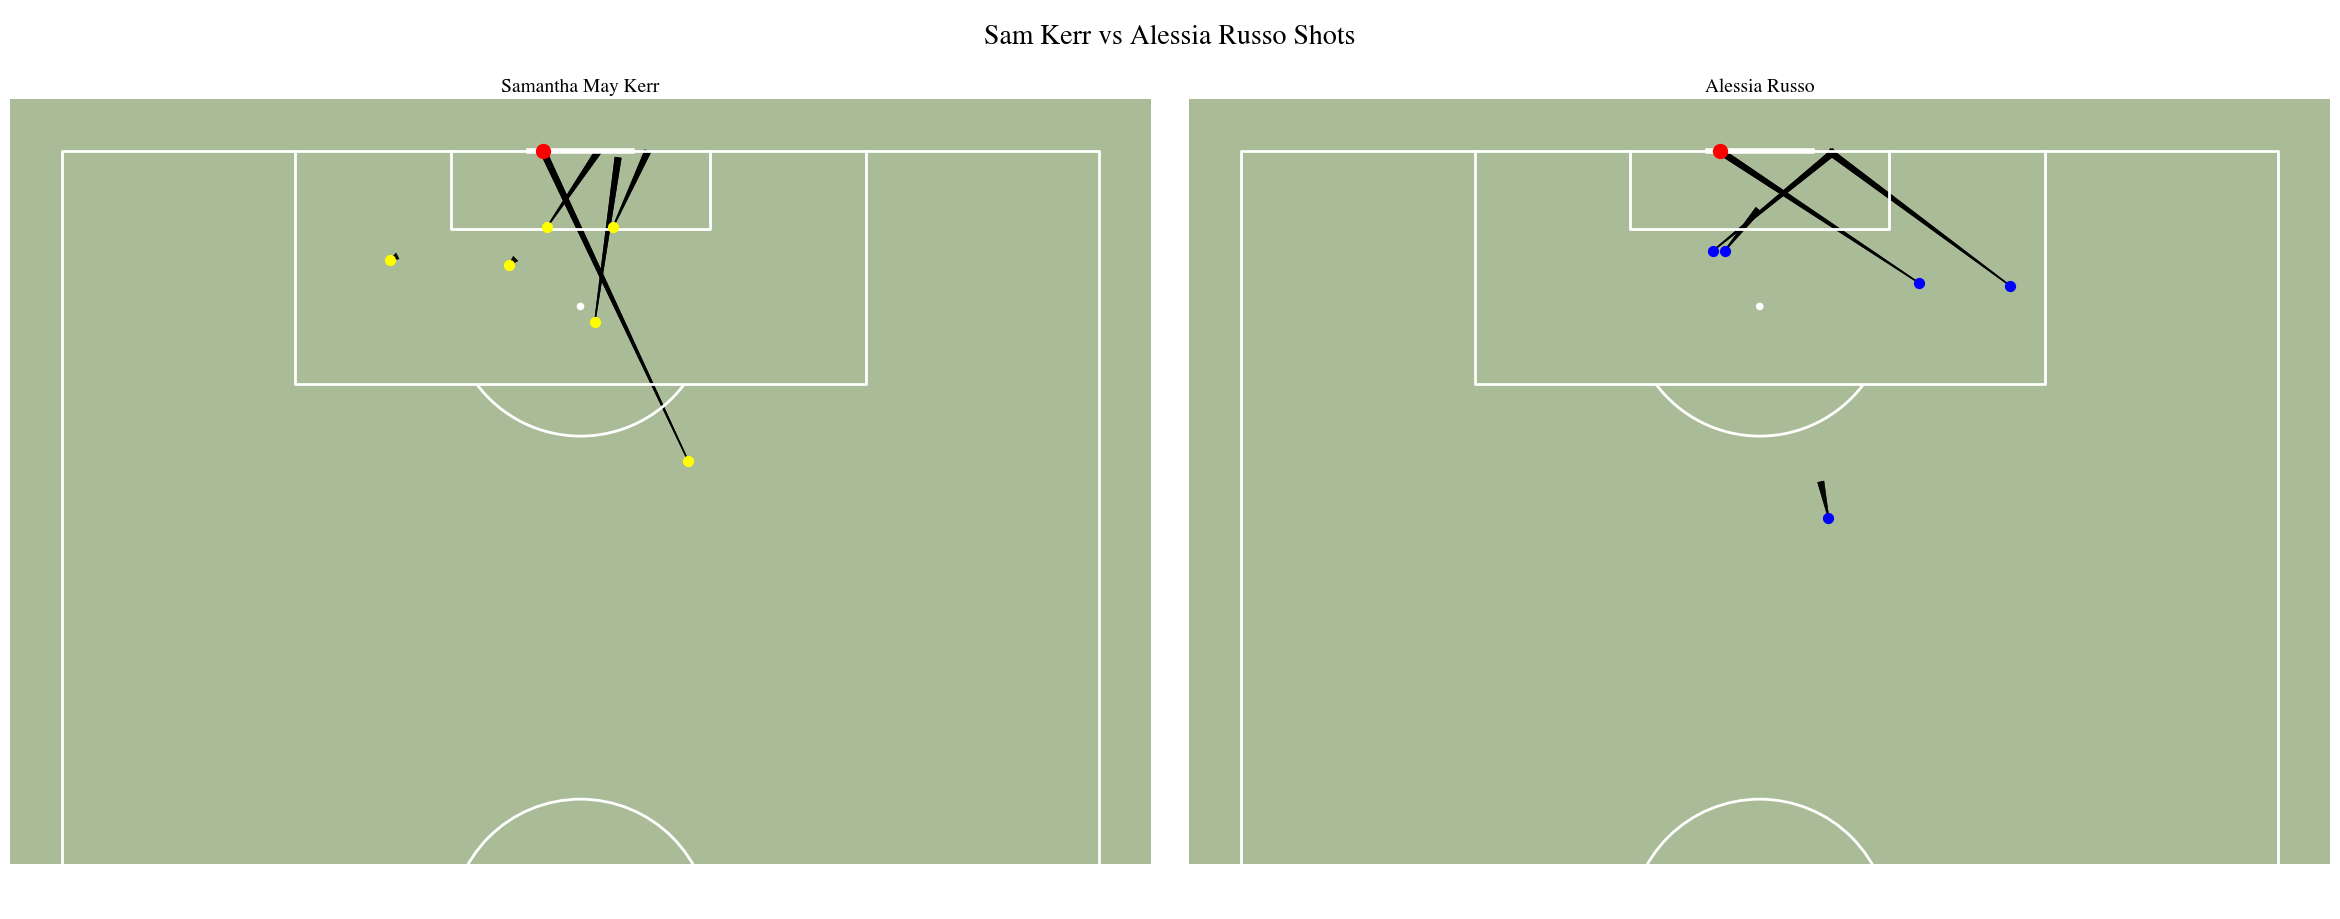

<Figure size 2100x1360 with 0 Axes>

In [587]:
# Plot shot maps for each player


# df of shots by kerr and russo
shots = pd.concat([df_shot_kerr, df_shot_russo], ignore_index=True)

#get the list of all players who made a pass
names = shots['player'].unique()

# Draw 2x1 pitches
pitch = VerticalPitch(pitch_type='statsbomb', 
                  half=True ,
                  pad_bottom=-5,
                  pitch_color='#aabb97', 
                  line_color='white',)

fig, axs = pitch.grid(ncols=2, nrows=1, grid_height=0.85, title_height=0.06, axis=False, endnote_height=0.04, title_space=0.04, endnote_space=0.01)

plt.figure(figsize=(21, 13.6))

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    
    #put player name over the plot
    ax.text(40, 125, name,ha='center', va='center', fontsize=14)
    
    #take only passes by this player
    player_df = shots.loc[shots["player"] == name]
    
    #scatter -  plots the player position 
    if name == 'Samantha May Kerr':
        pitch.scatter(player_df.x_start, 
                  player_df.y_start, 
                  s = 50, 
                  color = "yellow", 
                  ax=ax)
        
    if name == 'Alessia Russo':
        pitch.scatter(player_df.x_start, 
                  player_df.y_start, 
                  s = 50, 
                  color = "blue", 
                  ax=ax)
    
    #plot shot lines 
    pitch.lines(xstart = player_df['x_start'], 
                ystart = player_df['y_start'], 
                xend = player_df['x_end'], 
                yend = player_df['y_end'], 
                ax = ax,
                zorder=0,
                color='black',
                comet=True)
    
    #find the goals and plot them
    df_goal = player_df[player_df['shot_outcome'] == 'Goal'].reset_index(drop=True)

    pitch.scatter(x=df_goal['x_end'], 
                  y=df_goal['y_end'], 
                  ax=ax, 
                  color='red', 
                  s=100, 
                  zorder=1)


# Set title
axs['title'].text(0.5, 0.5, "Sam Kerr vs Alessia Russo Shots", ha='center', va='center', fontsize=20)
plt.show()


# Highlight on the goals scored by each player

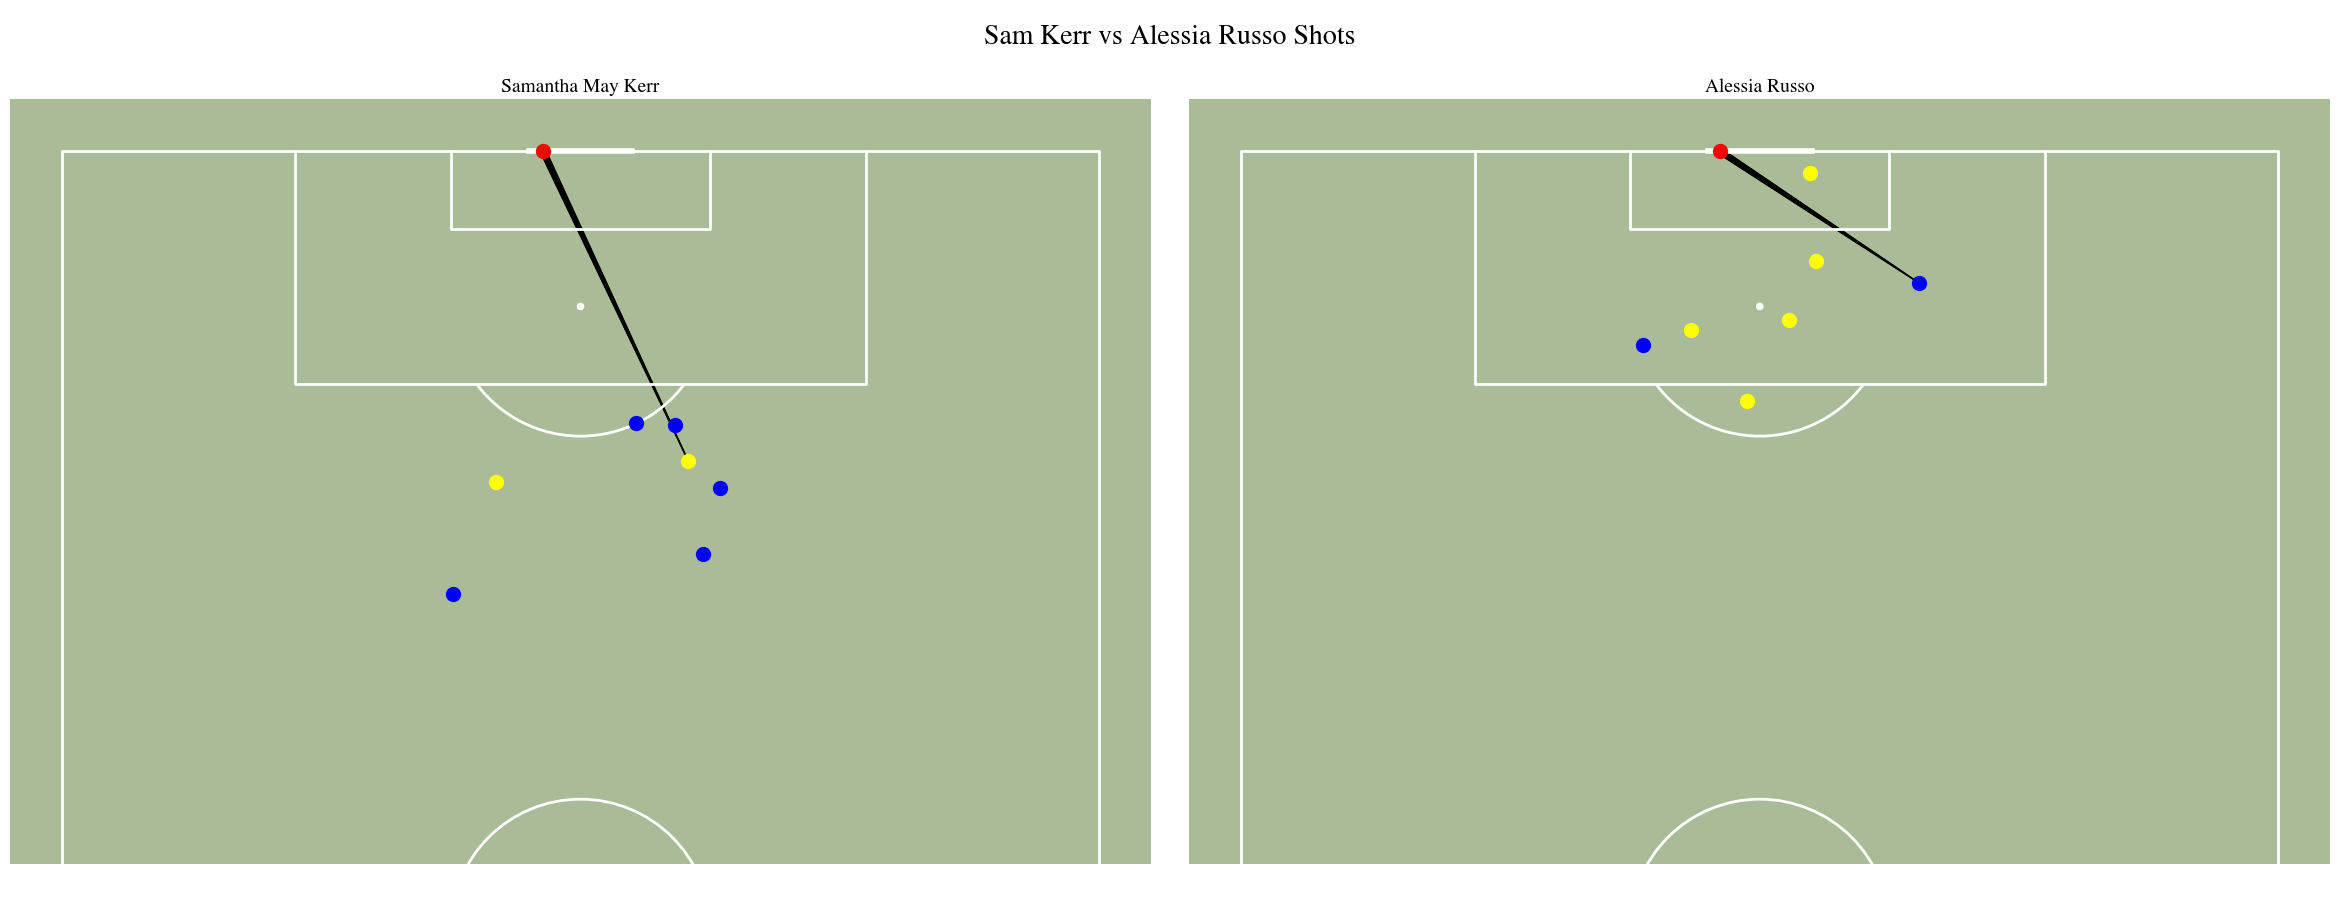

<Figure size 2100x1360 with 0 Axes>

In [588]:
# Plot diagrams of players positions for each players goals

# df of shots by kerr and russo
shots = pd.concat([df_shot_kerr, df_shot_russo], ignore_index=True)

#get the list of all players who made a pass
names = shots['player'].unique()

# Draw 2x1 pitches
pitch = VerticalPitch(pitch_type='statsbomb', 
                      half=True ,
                      pad_bottom=-5,
                      pitch_color='#aabb97', 
                      line_color='white',)

fig, axs = pitch.grid(ncols=2, nrows=1, grid_height=0.85, title_height=0.06, axis=False, endnote_height=0.04, title_space=0.04, endnote_space=0.01)

plt.figure(figsize=(21, 13.6))

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    
    #put player name over the plot
    ax.text(40, 125, name,ha='center', va='center', fontsize=14)
    
    df_goal = shots.loc[shots["shot_outcome"] == 'Goal']
    df_goal = df_goal.loc[df_goal["player"] == name]

    pitch.scatter(x = df_goal['x_start'], 
                  y = df_goal['y_start'], 
                  ax = ax)

    pitch.scatter(x = df_goal['x_end'], 
              y = df_goal['y_end'], 
              ax = ax,
              zorder=2,
              color='red',
              s=100)

    pitch.lines(xstart = df_goal['x_start'], 
            ystart = df_goal['y_start'], 
            xend = df_goal['x_end'], 
            yend = df_goal['y_end'], 
            ax = ax,
            zorder=0,
            color='black',
            comet=True)
    
    if name == 'Samantha May Kerr':
        for x in df_goal.iloc[0]['freeze_frame']:
            if x['teammate']:
                color = 'yellow'
            else:
                color = 'blue'
            
            pitch.scatter(x=x['location'][0], y=x['location'][1], ax=ax, c=color, s=100)
            
    if name == 'Alessia Russo':
        for x in df_goal.iloc[0]['freeze_frame']:
            if x['teammate']:
                color = 'blue'
            else:
                color = 'yellow'
            
            pitch.scatter(x=x['location'][0], y=x['location'][1], ax=ax, c=color, s=100)


#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, "Sam Kerr vs Alessia Russo Shots", ha='center', va='center', fontsize=20)
plt.show()

# Events leading up to Sam Kerr's goal

In [589]:
# Get all rows that involve Sam Kerr
kerr_rows = df[df['player'] == 'Samantha May Kerr']
kerr_goal_row = kerr_rows.index[kerr_rows['shot_outcome'] == 'Goal'][0]
print(kerr_goal_row)

3086


In [590]:
# Find the time of Kerr's goal
df['timestamp'][3086]

'00:17:25.674'

In [591]:
# Get events that happened before Kerr's Goal
events = df[(df['timestamp'] >= '00:17:17.674') & (df['timestamp'] <= '00:17:25.674') & (df['period'] == 2)]
events['timestamp'] = pd.to_datetime(df['timestamp'])
events = events.sort_values('timestamp')

# Separate start positions of events leading up to Kerr's goal
events[['x_start','y_start']] = pd.DataFrame(events.location.tolist(), index=events.index)
events = events.iloc[1:]

# Calculate the end positions for each event based on the start position of the next event
events['x_end'] = events['x_start'].shift(-1)
events['y_end'] = events['y_start'].shift(-1)

# Find the end location of Kerr's goal
kerr_goal_location = events.loc[(events['player'] == 'Samantha May Kerr') & (events['shot_outcome'] == 'Goal')]
kerr_goal_location[['x_end','y_end','z_end']] = pd.DataFrame(kerr_goal_location.shot_end_location.tolist(), index=kerr_goal_location.index)
goal_x = kerr_goal_location['x_end']
goal_y = kerr_goal_location['y_end']

# Add end location of Kerr's goal into the df
events['x_end'] = events['x_end'].fillna(goal_x)
events['y_end'] = events['y_end'].fillna(goal_y)

# Remove row that doesn't represent a required event
events = events.drop([1574])

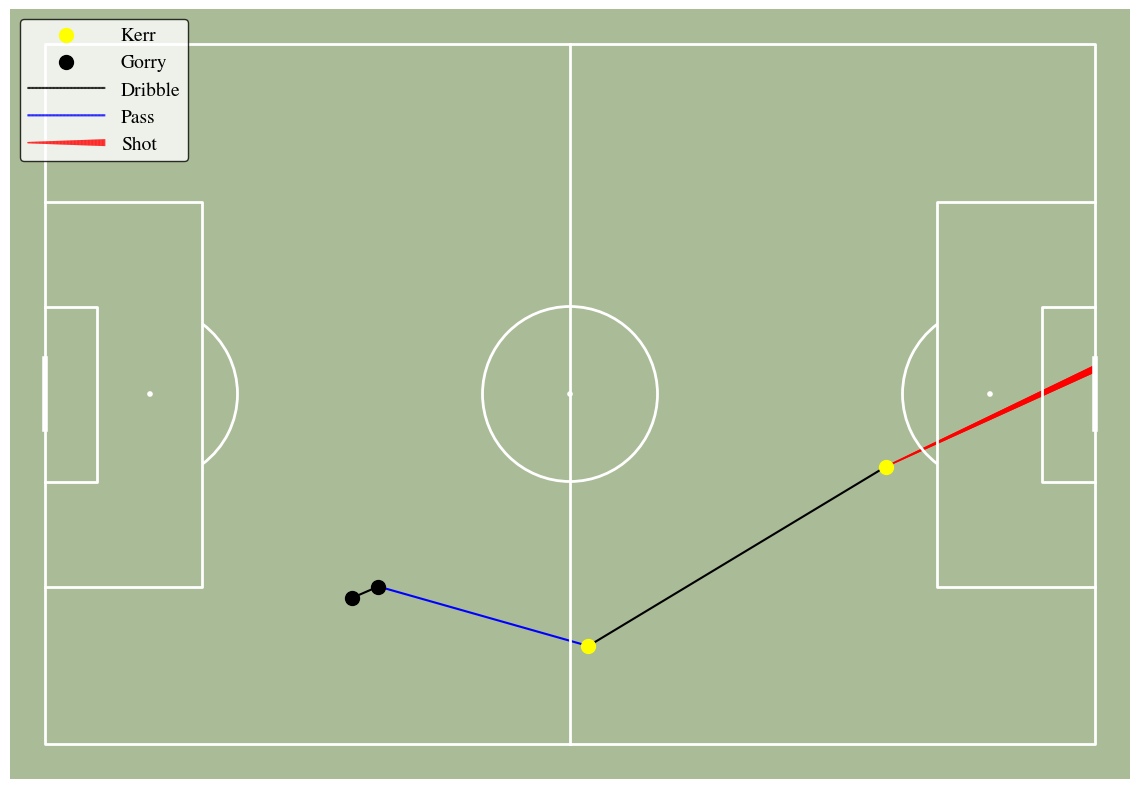

In [592]:
# Create a plot of the events leading up to Kerr's goal

# create the pitch
p = Pitch(pitch_type='statsbomb',
          pitch_color='#aabb97', 
          line_color='white',
          line_zorder=2)

fig, ax = p.draw(figsize=(13.5,8))

# Create separate df for each event for each player
kerr = events[events['player'] == 'Samantha May Kerr']
gorry = events[events['player'] == 'Katrina Gorry']
pass_df = events[events['type'] == 'Pass']
shot_df = events[events['type'] == 'Shot']
others_df = events[(events['type'] == 'Carry') | (events['type'] == 'Ball Recovery')]

# Plot player positions
p.scatter(x=kerr['x_start'], 
          y=kerr['y_start'], 
          ax=ax,
          color='yellow',
          zorder=1,
            s=100,
          label = 'Kerr'
         )

p.scatter(x=gorry['x_start'], 
          y=gorry['y_start'], 
          ax=ax,
          color='black',
          zorder=1,
            s=100,
          label = 'Gorry'
         )

# Plot lines for each of the event types
p.lines(xstart=others_df['x_start'], 
        ystart=others_df['y_start'], 
        xend=others_df['x_end'], 
        yend=others_df['y_end'], 
        ax=ax,
        color='black',
        linewidth = 1.5,
        zorder=0,
       label='Dribble')

p.lines(xstart=pass_df['x_start'], 
        ystart=pass_df['y_start'], 
        xend=pass_df['x_end'], 
        yend=pass_df['y_end'], 
        ax=ax,
        color='blue',
        linewidth = 1.5,
        zorder=0,
       label='Pass')

p.lines(xstart=shot_df['x_start'], 
        ystart=shot_df['y_start'], 
        xend=shot_df['x_end'], 
        yend=shot_df['y_end'], 
        ax=ax,
        color='red',
        zorder=0,
       label='Shot',
       comet=True)

# Plot the legend
ax.legend(facecolor='white', edgecolor='black', fontsize=14, loc='upper left', handlelength=4)

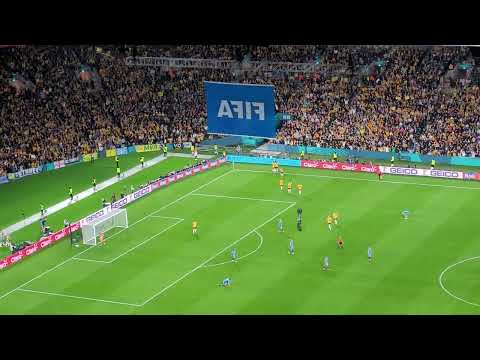

In [624]:
from IPython.display import YouTubeVideo

YouTubeVideo('53nqBRvg5bk', width=800, height=300)

# Events leading up to Alessia Russo's goal

In [593]:
# Get all rows that involve Russo
russo_rows = df[df['player'] == 'Alessia Russo']
russo_goal_row = russo_rows.index[russo_rows['shot_outcome'] == 'Goal'][0]
print(russo_goal_row)

3098


In [594]:
# Find the time of Kerr's goal
df['timestamp'][3098]

'00:40:43.741'

In [595]:
# Get events that happened before Russo's Goal
events2 = df[(df['timestamp'] >= '00:40:32.500') & (df['timestamp'] <= '00:40:43.741') & (df['period'] == 2) & (df['team'] == "England Women's")]
events2['timestamp'] = pd.to_datetime(df['timestamp'])
events2 = events2.sort_values('timestamp')

# Separate start positions of events leading up to Russo's goal
events2[['x_start','y_start']] = pd.DataFrame(events2.location.tolist(), index=events2.index)

# Remove row that doesn't represent a required event
events2 = events2.drop([2516,1716])

# Calculate the end positions for each event based on the start position of the next event
events2['x_end'] = events2['x_start'].shift(-1)
events2['y_end'] = events2['y_start'].shift(-1)

# Find the end location of Russo's goal
russo_goal_location = events2.loc[(events2['player'] == 'Alessia Russo') & (events2['shot_outcome'] == 'Goal')]
russo_goal_location[['x_end','y_end','z_end']] = pd.DataFrame(russo_goal_location.shot_end_location.tolist(), index=russo_goal_location.index)
goal_x2 = russo_goal_location['x_end']
goal_y2 = russo_goal_location['y_end']

# Add end location of Russo's goal into the df
events2['x_end'] = events2['x_end'].fillna(goal_x2)
events2['y_end'] = events2['y_end'].fillna(goal_y2)


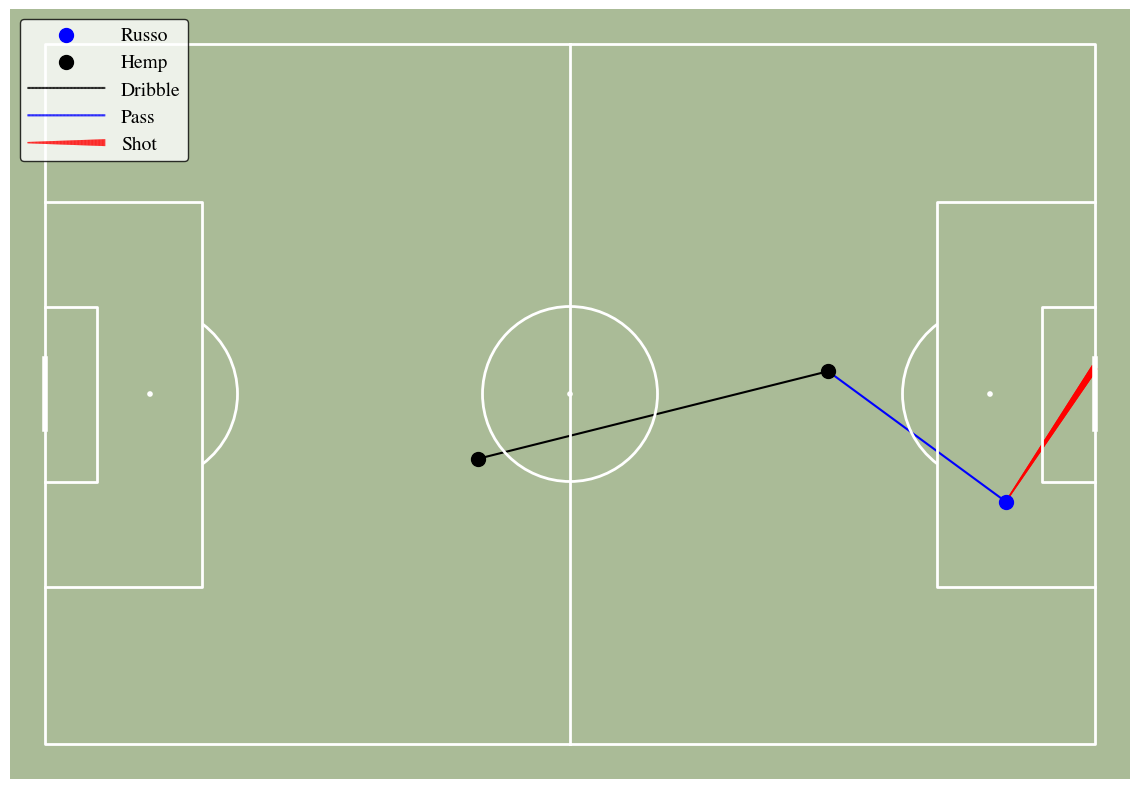

In [596]:
# Create a plot of the events leading up to Kerr's goal

# create the pitch
p = Pitch(pitch_type='statsbomb',
          pitch_color='#aabb97', 
          line_color='white',
          line_zorder=2)

fig, ax = p.draw(figsize=(13.5,8))

# Create separate df for each event for each player
russo = events2[events2['player'] == 'Alessia Russo']
hemp = events2[events2['player'] == 'Lauren Hemp']
pass_df = events2[events2['type'] == 'Pass']
shot_df = events2[events2['type'] == 'Shot']
carry_df = events2[events2['type'] == 'Carry']

# Plot player positions
p.scatter(x=russo['x_start'], 
          y=russo['y_start'], 
          ax=ax,
          color='blue',
          zorder=1,
            s=100,
          label = 'Russo'
         )

p.scatter(x=hemp['x_start'], 
          y=hemp['y_start'], 
          ax=ax,
          color='black',
          zorder=1,
            s=100,
          label = 'Hemp'
         )

# Plot lines for each event type
p.lines(xstart=carry_df['x_start'], 
        ystart=carry_df['y_start'], 
        xend=carry_df['x_end'], 
        yend=carry_df['y_end'], 
        ax=ax,
        color='black',
        linewidth = 1.5,
        zorder=0,
       label='Dribble')

p.lines(xstart=pass_df['x_start'], 
        ystart=pass_df['y_start'], 
        xend=pass_df['x_end'], 
        yend=pass_df['y_end'], 
        ax=ax,
        color='blue',
        linewidth = 1.5,
        zorder=0,
       label='Pass')

p.lines(xstart=shot_df['x_start'], 
        ystart=shot_df['y_start'], 
        xend=shot_df['x_end'], 
        yend=shot_df['y_end'], 
        ax=ax,
        color='red',
        zorder=0,
       label='Shot',
       comet=True)

# Plot the legend
ax.legend(facecolor='white', edgecolor='black', fontsize=14, loc='upper left', handlelength=4)


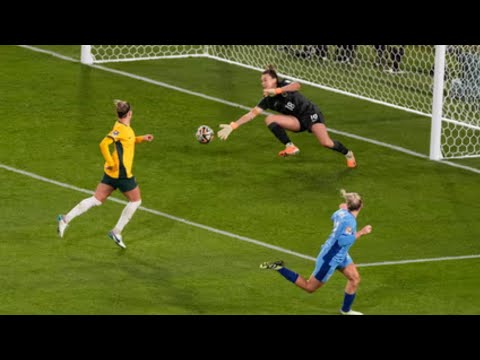

In [625]:
from IPython.display import YouTubeVideo

YouTubeVideo('vsNoMlINs4Q', width=800, height=300)

# Pass maps for each player
## Arrows and heatmaps

In [597]:
# Create df for all passes by each player
df_pass_kerr = df[(df['player_id'] == KERR) & (df['type'] == 'Pass')].reset_index(drop=True)
df_pass_russo = df[(df['player_id'] == RUSSO) & (df['type'] == 'Pass')].reset_index(drop=True)

# Separate start and end locations and create new columns
df_pass_kerr[['x_start','y_start']] = pd.DataFrame(df_pass_kerr.location.tolist(), index=df_pass_kerr.index)
df_pass_kerr[['x_end','y_end']] = pd.DataFrame(df_pass_kerr.pass_end_location.tolist(), index=df_pass_kerr.index)

df_pass_russo[['x_start','y_start']] = pd.DataFrame(df_pass_russo.location.tolist(), index=df_pass_russo.index)
df_pass_russo[['x_end','y_end']] = pd.DataFrame(df_pass_russo.pass_end_location.tolist(), index=df_pass_russo.index)

Text(0.5, 1.0, 'Sam Kerr Pass Map')

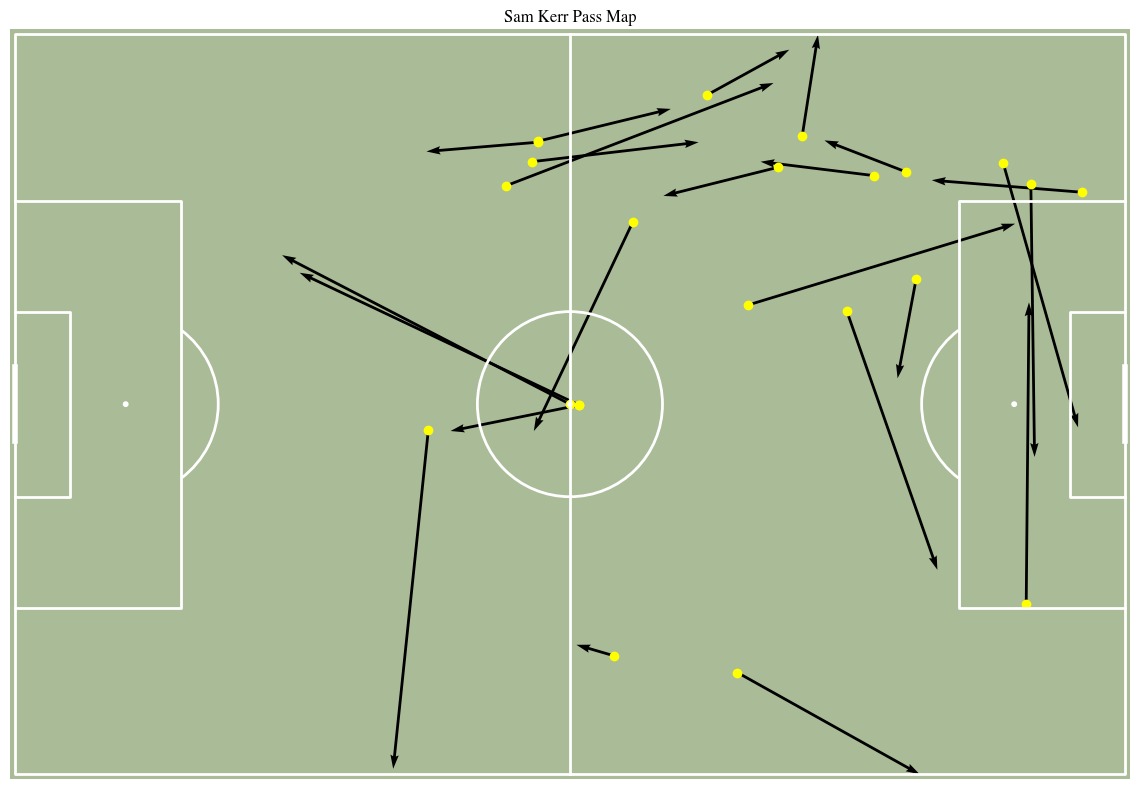

In [598]:
# Plot pass map for Sam Kerr

# Create the pitch
p = Pitch(pitch_type='statsbomb',
          pitch_color='#aabb97', 
          line_color='white',
          line_zorder=2)

fig, ax = p.draw(figsize=(13.5,8))


# Plot the player positions
p.scatter(x=df_pass_kerr['x_start'], 
          y=df_pass_kerr['y_start'], 
          ax=ax,
          color='yellow',
          zorder=1)

# Plot the passes as arrows
p.arrows(xstart=df_pass_kerr['x_start'], 
        ystart=df_pass_kerr['y_start'], 
        xend=df_pass_kerr['x_end'], 
        yend=df_pass_kerr['y_end'], 
        ax=ax,
        width=2,
        zorder=0)

# Change font to avoid font not found errors
plt.rcParams["font.family"] = "times"

# Restrict boundaries of pitch
plt.xlim(-0.5,120.5)
plt.ylim(80.5,-0.5)

# Set title
plt.title('Sam Kerr Pass Map')

Text(0.5, 1.0, 'Sam Kerr Pass Heatmap')

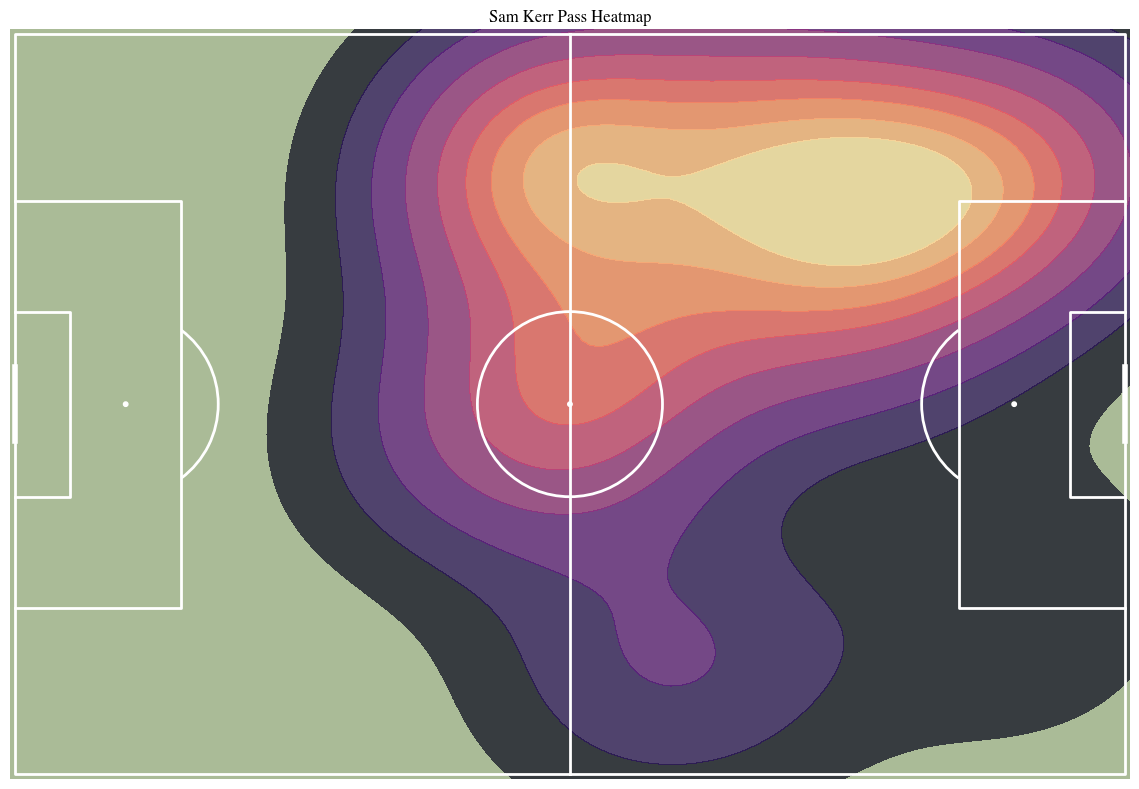

In [599]:
# Plot heatmap of Sam Kerr's passes

# Create pitch
p = Pitch(pitch_type='statsbomb',
          pitch_color='#aabb97', 
          line_color='white',
          line_zorder=2)

fig, ax = p.draw(figsize=(13.5,8))

# Create heatmap using pass df
kde = sns.kdeplot(x = df_pass_kerr['x_start'],
                  y = df_pass_kerr['y_start'],
                  shade = True,
                  shade_lowest = False,
                  alpha = 0.7,
                  cmap = 'magma',
                  zorder=1
        )

# Change font to avoid font not found errors
plt.rcParams["font.family"] = "times"

# Restrict limits of pitch
plt.xlim(-0.5,120.5)
plt.ylim(80.5,-0.5)

# Set title
plt.title('Sam Kerr Pass Heatmap')

Text(0.5, 1.0, 'Alessia Russo Pass Map')

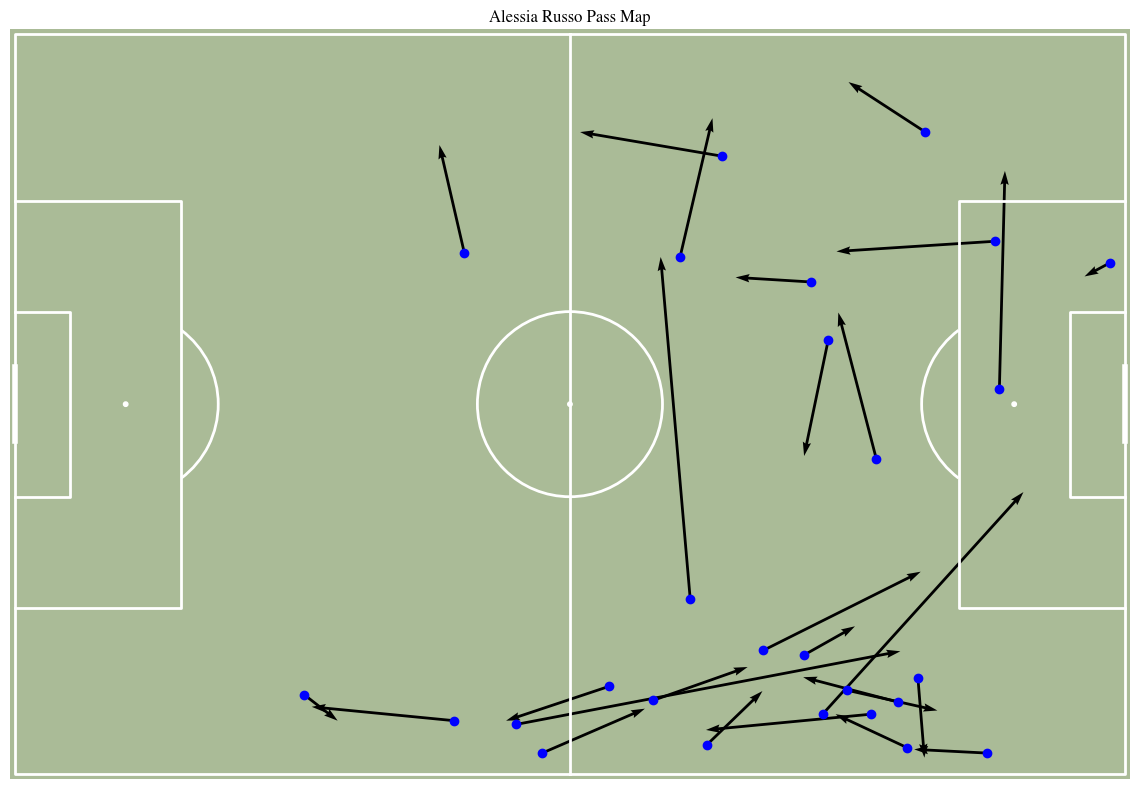

In [600]:
# Plot pass map for Alessia Russo

# Create the pitch
p = Pitch(pitch_type='statsbomb',
          pitch_color='#aabb97', 
          line_color='white',
          line_zorder=2)

fig, ax = p.draw(figsize=(13.5,8))

# Plot player locations
p.scatter(x=df_pass_russo['x_start'], 
          y=df_pass_russo['y_start'], 
          ax=ax,
          color='blue',
          zorder=1)

# Plot passes as arrows
p.arrows(xstart=df_pass_russo['x_start'], 
        ystart=df_pass_russo['y_start'], 
        xend=df_pass_russo['x_end'], 
        yend=df_pass_russo['y_end'], 
        ax=ax,
        width=2,
        zorder=0)

# Change font to avoid font not found errors
plt.rcParams["font.family"] = "times"

# Restrict limits of pitch
plt.xlim(-0.5,120.5)
plt.ylim(80.5,-0.5)

# Set title
plt.title('Alessia Russo Pass Map')

Text(0.5, 1.0, 'Alessia Russo Pass Heatmap')

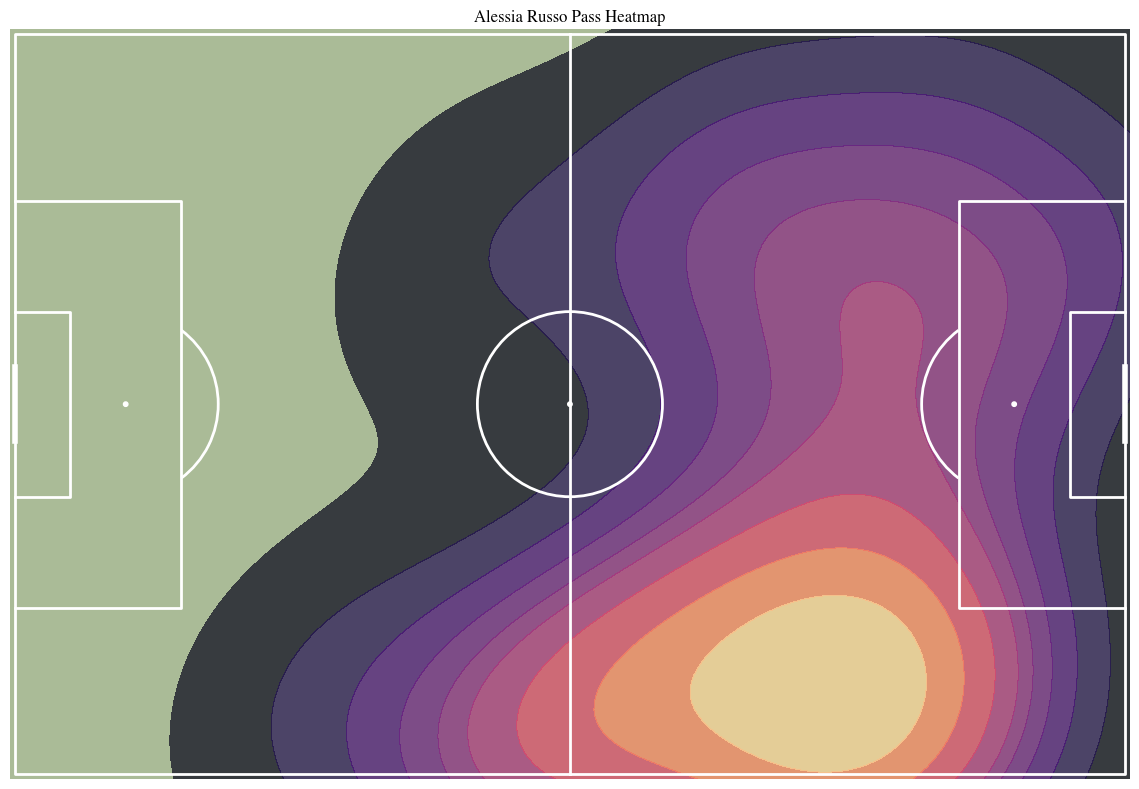

In [601]:
# Create heatmap of Russo's passes

p = Pitch(pitch_type='statsbomb',
          pitch_color='#aabb97', 
          line_color='white',
          line_zorder=2)

fig, ax = p.draw(figsize=(13.5,8))

# Create heatmap of Russo's passes
kde = sns.kdeplot(x = df_pass_russo['x_start'],
                  y = df_pass_russo['y_start'],
                  shade = True,
                  shade_lowest = False,
                  alpha = 0.7,
                  cmap = 'magma',
                  zorder=1
        )

# Change font to avoid font not found errors
plt.rcParams["font.family"] = "times"

# Restrict limits of pitch
plt.xlim(-0.5,120.5)
plt.ylim(80.5,-0.5)

# Set title
plt.title('Alessia Russo Pass Heatmap')

# Heatmaps of all events by Kerr & Russo

In [602]:
# Create df of all events by the players
df_kerr = df[df['player_id'] == KERR].reset_index(drop=True)
df_russo = df[df['player_id'] == RUSSO].reset_index(drop=True)

# Drop event that does not have a location - substitution
df_russo = df_russo.dropna(subset=['location'])

# Create new columns by separating start and end locations
df_kerr[['x','y']] = pd.DataFrame(df_kerr.location.tolist(), index=df_kerr.index)
df_russo[['x','y']] = pd.DataFrame(df_russo.location.tolist(), index=df_russo.index)

Text(0.5, 1.0, 'Sam Kerr Event Heatmap')

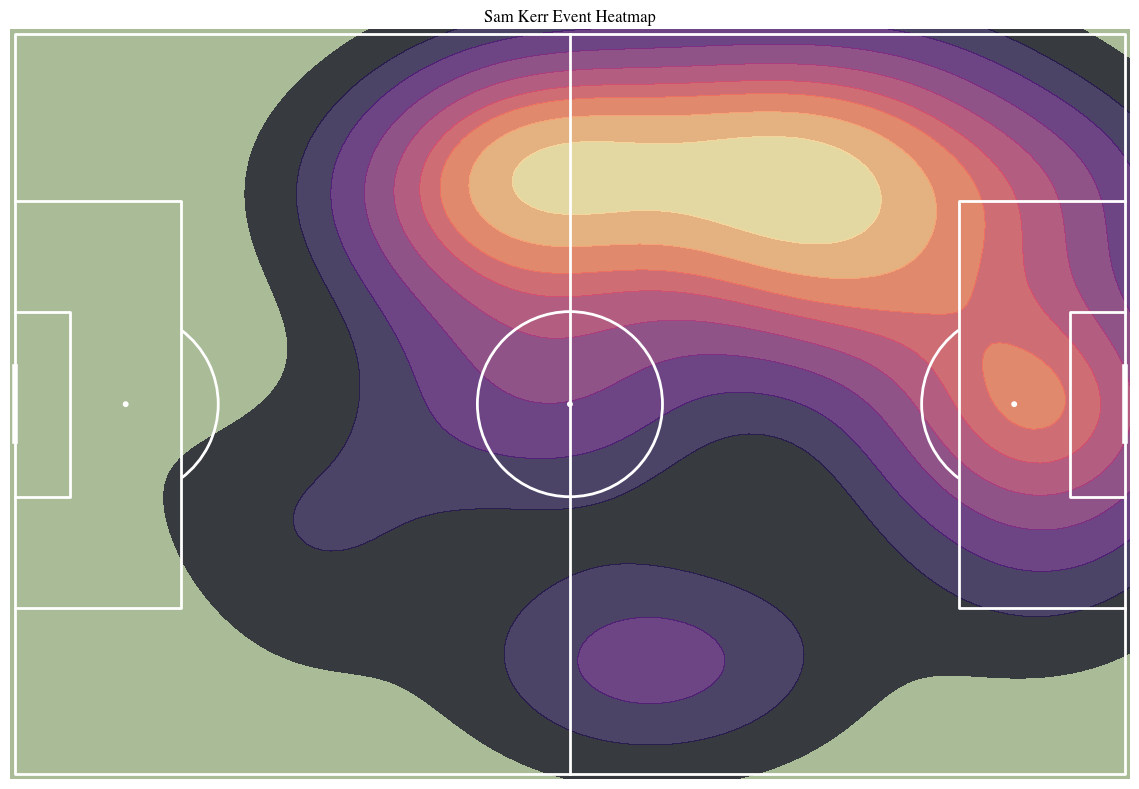

In [603]:
# Create heatmap of Sam Kerr's events

# Create pitch
p = Pitch(pitch_type='statsbomb',
          pitch_color='#aabb97', 
          line_color='white',
          line_zorder=2)

fig, ax = p.draw(figsize=(13.5,8))

# Plot heatmap of events
kde = sns.kdeplot(x = df_kerr['x'],
                  y = df_kerr['y'],
                  shade = True,
                  shade_lowest = False,
                  alpha = 0.7,
                  cmap = 'magma',
                  zorder=1
        )

plt.rcParams["font.family"] = "times"

plt.xlim(-0.5,120.5)
plt.ylim(80.5,-0.5)

plt.title('Sam Kerr Event Heatmap')

Text(0.5, 1.0, 'Alessia Russo Event Heatmap')

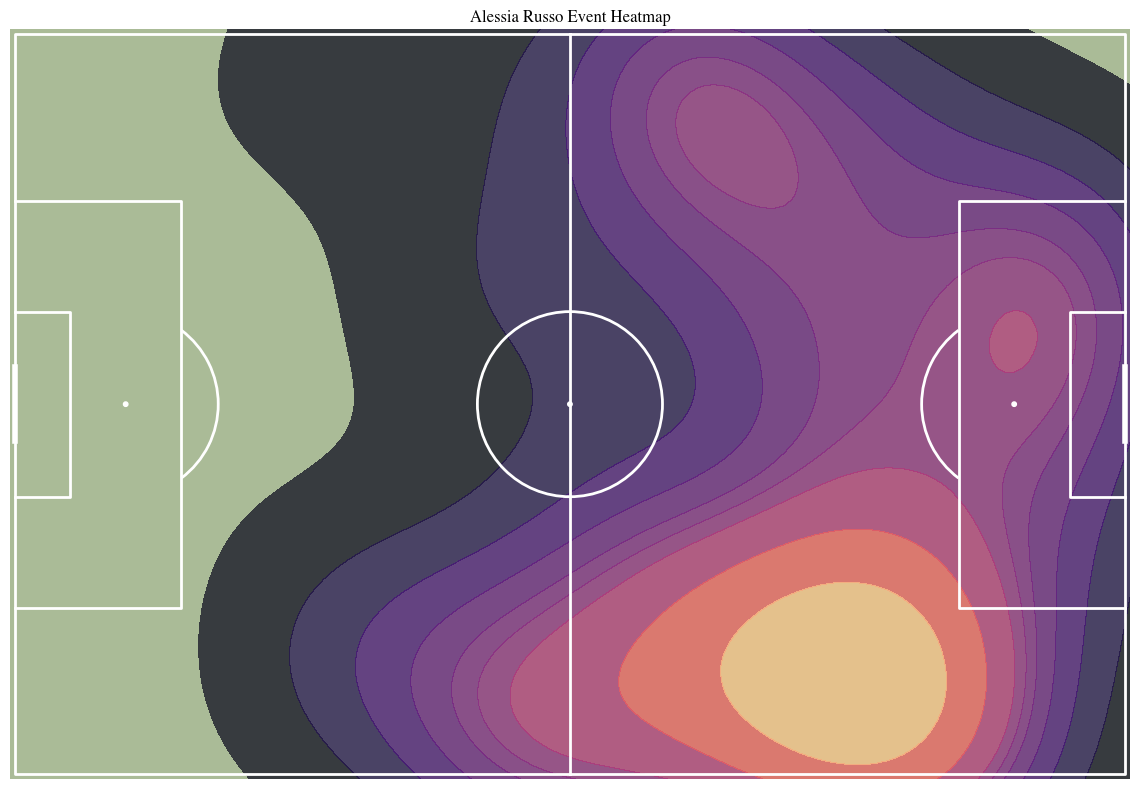

In [604]:
# Create heatmap of Alessia Russo's events

# Create pitch
p = Pitch(pitch_type='statsbomb',
          pitch_color='#aabb97', 
          line_color='white',
          line_zorder=2)

fig, ax = p.draw(figsize=(13.5,8))

# Plot heatmap of events
kde = sns.kdeplot(x = df_russo['x'],
                  y = df_russo['y'],
                  shade = True,
                  shade_lowest = False,
                  alpha = 0.7,
                  cmap = 'magma',
                  zorder=1
        )

plt.rcParams["font.family"] = "times"

plt.xlim(-0.5,120.5)
plt.ylim(80.5,-0.5)

plt.title('Alessia Russo Event Heatmap')

# Average player position during match

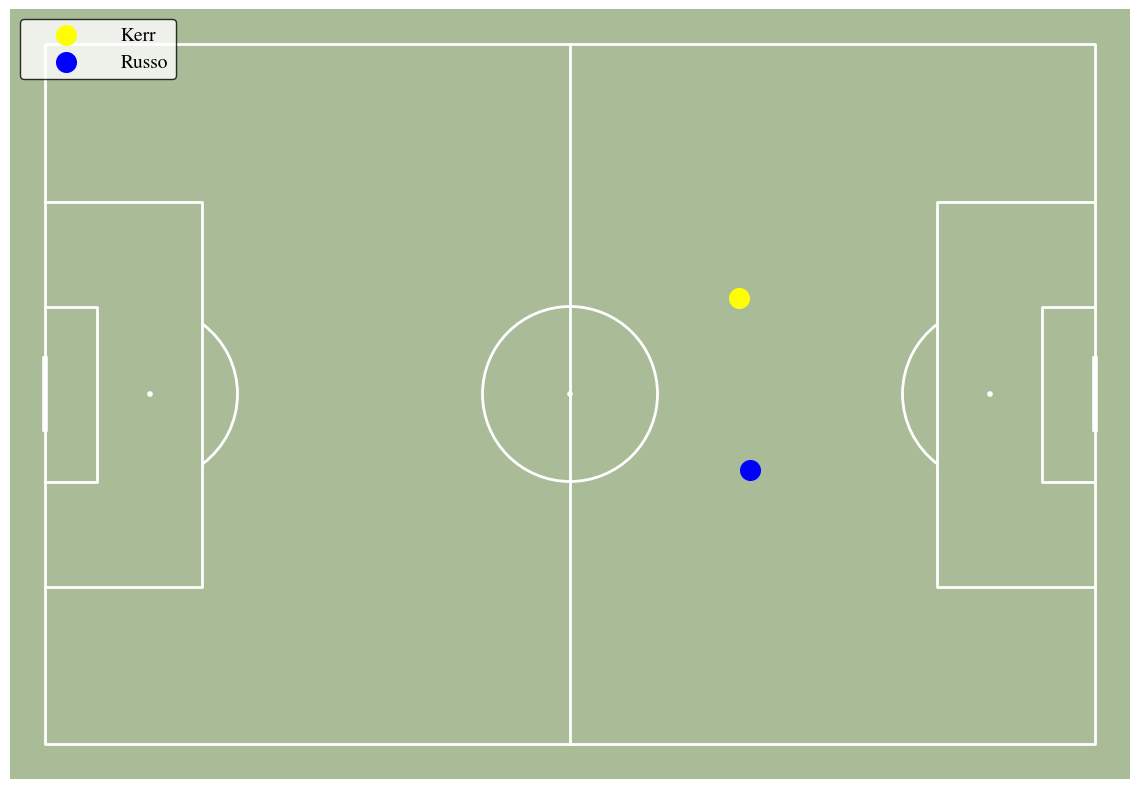

In [605]:
# plot average player position from events

kerr_x = df_kerr['x'].mean()
kerr_y = df_kerr['y'].mean()
russo_x = df_russo['x'].mean()
russo_y = df_russo['y'].mean()

p = Pitch(pitch_type='statsbomb',
          pitch_color='#aabb97', 
          line_color='white',
          line_zorder=2)

fig, ax = p.draw(figsize=(13.5,8))

p.scatter(x=kerr_x, 
          y=kerr_y, 
          ax=ax,
          color='yellow',
          zorder=1,
          s=200,
          label='Kerr')

p.scatter(x=russo_x, 
          y=russo_y, 
          ax=ax,
          color='blue',
          zorder=1,
          s=200,
          label='Russo')

# Plot the legend
ax.legend(facecolor='white', edgecolor='black', fontsize=14, loc='upper left', handlelength=4)

# Radar chart of Kerr v Russo

In [606]:
# Scrape player stats from FBref for required match - Australia

url = 'https://fbref.com/en/matches/7b6eb058/Australia-England-August-16-2023-Womens-World-Cup'
html = requests.get(url).content
df_list = pd.read_html(html)
df_stats_aus = df_list[3]
print(df_stats_aus)

    Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                Player                  #                Pos   
0             Sam Kerr               20.0                 FW   
1          Mary Fowler               11.0              FW,CM   
2        Caitlin Foord                9.0                 LM   
3    Kyra Cooney-Cross               23.0              CM,RB   
4        Katrina Gorry               19.0                 CM   
5         Alex Chidiac                8.0                 RM   
6          Hayley Raso               16.0                 RM   
7         Cortnee Vine                5.0              RM,RB   
8         Steph Catley                7.0                 LB   
9   Clare Polkinghorne                4.0                 CB   
10    Emily van Egmond               10.0                 FW   
11          Clare Hunt               15.0                 CB   
12     Ellie Carpenter               21.0              RB,CB   
13    Mackenzie Arnold               18.

In [607]:
# Remove extra header level
df_stats_aus = df_stats_aus.droplevel(level=0, axis=1)
df_stats_aus.head()

,Player,#,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,...,SCA,GCA,Cmp,Att,Cmp%,PrgP,Carries,PrgC,Att,Succ
0,Sam Kerr,20.0,FW,29-340,90,1,0,0,0,6,...,1,0,13,24,54.2,2,21,2,0,0
1,Mary Fowler,11.0,"FW,CM",20-183,90,0,0,0,0,2,...,3,0,20,28,71.4,5,24,1,3,2
2,Caitlin Foord,9.0,LM,28-278,90,0,0,0,0,0,...,1,0,23,33,69.7,6,24,1,5,1
3,Kyra Cooney-Cross,23.0,"CM,RB",21-182,90,0,0,0,0,0,...,3,0,26,38,68.4,3,27,2,3,2
4,Katrina Gorry,19.0,CM,31-003,87,0,1,0,0,1,...,2,1,25,34,73.5,0,32,1,1,0


In [608]:
# Create df of Sam Kerr's stats and look at columns
df_stats_kerr = df_stats_aus[df_stats_aus['Player'] == 'Sam Kerr']
df_stats_kerr.columns

Index(['Player', '#', 'Pos', 'Age', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh',
       'SoT', 'CrdY', 'CrdR', 'Touches', 'Tkl', 'Int', 'Blocks', 'xG', 'npxG',
       'xAG', 'SCA', 'GCA', 'Cmp', 'Att', 'Cmp%', 'PrgP', 'Carries', 'PrgC',
       'Att', 'Succ'],
      dtype='object')

In [609]:
df_stats_kerr

,Player,#,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,...,SCA,GCA,Cmp,Att,Cmp%,PrgP,Carries,PrgC,Att,Succ
0,Sam Kerr,20.0,FW,29-340,90,1,0,0,0,6,...,1,0,13,24,54.2,2,21,2,0,0


In [610]:
# Scrape player stats from FBref for required match - England

url = 'https://fbref.com/en/matches/7b6eb058/Australia-England-August-16-2023-Womens-World-Cup'
html = requests.get(url).content
df_list = pd.read_html(html)
df_stats_eng = df_list[10]
print(df_stats_eng)

   Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
               Player                  #                Pos   
0         Lauren Hemp               11.0                 FW   
1       Alessia Russo               23.0                 FW   
2         Chloe Kelly               18.0                 FW   
3          Ella Toone               10.0                 AM   
4       Niamh Charles                3.0                 CM   
5         Keira Walsh                4.0                 CM   
6     Georgia Stanway                8.0                 CM   
7         Rachel Daly                9.0                 WB   
8         Lucy Bronze                2.0                 WB   
9      Alex Greenwood                5.0                 CB   
10      Millie Bright                6.0                 CB   
11        Jess Carter               16.0                 CB   
12         Mary Earps                1.0                 GK   
13         13 Players                NaN               

In [611]:
# Remove extra header level
df_stats_eng = df_stats_eng.droplevel(level=0, axis=1)

In [612]:
# Create df of Alessia Russo's stats
df_stats_russo = df_stats_eng[df_stats_eng['Player'] == 'Alessia Russo']

In [613]:
df_stats_russo

,Player,#,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,...,SCA,GCA,Cmp,Att,Cmp%,PrgP,Carries,PrgC,Att,Succ
1,Alessia Russo,23.0,FW,24-189,86,1,0,0,0,5,...,4,0,20,27,74.1,1,27,1,6,3


In [614]:
# combine kerr and russo stats
df_stats_combined = pd.concat([df_stats_kerr, df_stats_russo], ignore_index=True)

In [615]:
# drop columns that aren't needed for radar chart
df_stats_combined = df_stats_combined.drop(['Ast','#','Pos','Age','Min','CrdY', 'CrdR','npxG','PK','PKatt','Int','GCA'], axis=1)

In [616]:
df_stats_combined.columns

Index(['Player', 'Gls', 'Sh', 'SoT', 'Touches', 'Tkl', 'Blocks', 'xG', 'xAG',
       'SCA', 'Cmp', 'Att', 'Cmp%', 'PrgP', 'Carries', 'PrgC', 'Att', 'Succ'],
      dtype='object')

In [617]:
# rename columns for easier reading
df_stats_combined.columns = ['Player', 'Goals', 'Shots', 'Shots on Target', 'Touches', 'Tackles', 'Blocks', 'xGoals', 'xAssist',
       'Shot creations', 'Pass completed', 'Pass Attempted', 'Pass Completion %', 'Progressive Passes', 'Carries', 'Progressive Carries', 'Take on Attempts', 'Take on Success']

In [618]:
# create list of parameters from column names
params = list(df_stats_combined.columns)
params = params[1:]

#add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = df_stats_combined[params][x].min()
    a = a * 0.75
    
    b = df_stats_combined[params][x].max()
    b = b * 1.25
    
    ranges.append((a,b))
    
for x in range(len(df_stats_combined['Player'])):
    if df_stats_combined['Player'][x] == 'Sam Kerr':
        a_values = df_stats_combined.iloc[x].tolist()
    if df_stats_combined['Player'][x] == 'Alessia Russo':
        b_values = df_stats_combined.iloc[x].tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values, b_values]

# title settings

title = dict(
    title_name = 'Sam Kerr',
    title_color = 'yellow',
    subtitle_name = 'Australia',
    subtitle_color = 'yellow',
    title_name_2 = 'Alessia Russo',
    title_color_2 = 'red',
    subtitle_name_2 = 'England',
    subtitle_color_2 = 'red',
    title_fontsize = 18,
    subtitle_fontsize = 15
)

endnote = 'Matt Steel \ndata via FBREF / Statsbomb'

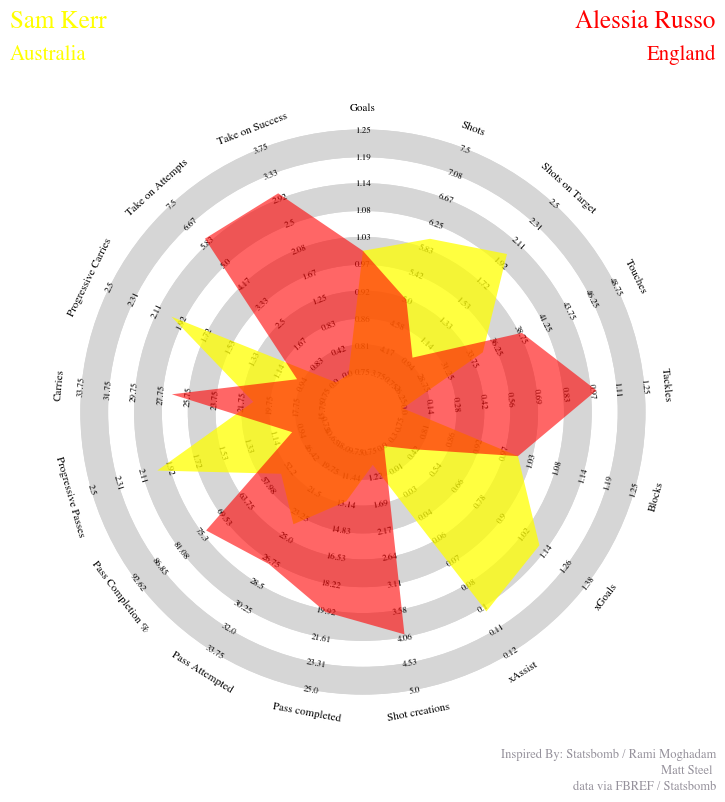

In [619]:
# plot radar chart 

radar = Radar(fontfamily="Times",
                          label_fontsize=8)

fig, ax = radar.plot_radar(ranges = ranges,
                              params = params,
                              values = values,
                              radar_color = ['yellow','red'],
                              alphas=[0.75,0.6],
                              title = title,
                              endnote = endnote,
                              compare=True,)